In [138]:
%load_ext autoreload
%autoreload 2

import sys
#sys.path.append('/global/homes/l/lbigwood/LSS/py')
sys.path.append('/global/homes/l/lbigwood/S4Mock/')

import S4Mock_io
import geometry
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from   desitarget.targets import desi_mask, bgs_mask, mws_mask, scnd_mask
from astropy.table import Table
nside=32
orig_density_per_deg = 2500
from corr_func_tools import calc_wtheta, create_axes
import astropy.io.fits as fits

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
pixel_area = hp.nside2pixarea(nside,degrees=True)
pixel_area

3.357174580844667

In [140]:
#open randoms
randoms = S4Mock_io.read_desitargetrandoms(number=1)

In [141]:
#apply bgs mask to randoms and printed statement shows cuts 
randoms=geometry.bgs_mask_randoms(randoms)

[1, 13]
BRIGHT 1 0.9905997485514495
CLUSTER 13 0.9904709859266433
NOBS 0.9771151783418405


In [142]:
target_pixel_density = geometry.targ_hpmap(randoms)

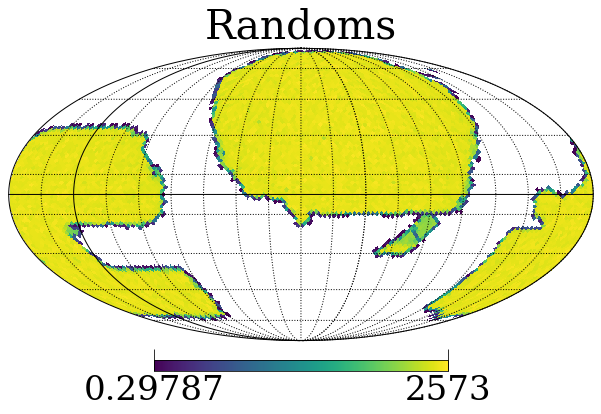

In [143]:
#target_pixel_density = geometry.targ_hpmap(randoms)
#mollview map of pixels
hp.mollview(target_pixel_density/pixel_area,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

In [144]:
#Caluclate norm i.e corr_pixel_area
pixel_area = hp.nside2pixarea(nside,degrees=True)

exp_density_per_pixel = pixel_area *orig_density_per_deg
filling_factor= target_pixel_density/exp_density_per_pixel
corr_pixel_area = pixel_area * filling_factor

NameError: name 'filling_factor3' is not defined

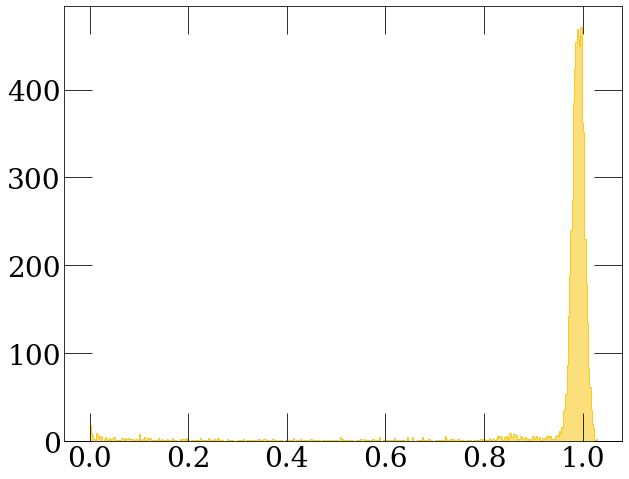

In [8]:
#histogram of filling factor: why does it have this shape?
#np.arange(0.0, 2.0, 0.025)

plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=28)

plt.figure(figsize=(10,8))

_ = plt.hist(filling_factor, bins=400, histtype='step', color = '#f9ca24')
_ = plt.hist(filling_factor, bins=400, histtype='bar', color = '#f9ca24',alpha =0.6,label = r'$N_{RAND}=1$')

_ = plt.hist(filling_factor3, bins=400, histtype='step', color = '#8c7ae6')
_ = plt.hist(filling_factor3, bins=400, histtype='bar', color = '#8c7ae6',alpha =0.6,label = r'$N_{RAND}=3$')

_ = plt.hist(filling_factor8, bins=400, histtype='step', color = '#eb4d4b')
_ = plt.hist(filling_factor8, bins=400, histtype='bar', color = '#eb4d4b',alpha =0.6,label = r'$N_{RAND}=8$')

filling_factor8 = filling_factor8[~np.isnan(filling_factor8)]
plt.axvline(x= np.percentile(filling_factor8,50),linestyle='dashed',color='k',alpha=0.8)

plt.xlabel('Random filling factor')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xlim(0.5,1.05)
plt.legend()
plt.savefig('filling_factor.png',bbox_inches='tight')

In [ ]:
np.percentile(filling_factor8,50)

In [153]:
main_survey_targs = S4Mock_io.read_mainsurvey_targets()

Runtime of 0.135354 seconds after 0 pixels
Runtime of 4.814393 seconds after 20 pixels
Runtime of 8.505444 seconds after 40 pixels
Runtime of 12.699105 seconds after 60 pixels
Runtime of 15.990257 seconds after 80 pixels
Runtime of 20.162868 seconds after 100 pixels
Runtime of 25.605705 seconds after 120 pixels
Runtime of 28.135470 seconds after 140 pixels
Runtime of 31.086195 seconds after 160 pixels
Runtime of 34.852424 seconds after 180 pixels
Runtime of 38.621329 seconds after 200 pixels
Runtime of 41.573493 seconds after 220 pixels
Runtime of 43.381067 seconds after 240 pixels
Runtime of 46.603338 seconds after 260 pixels
Runtime of 49.662736 seconds after 280 pixels
Runtime of 55.095834 seconds after 300 pixels
Runtime of 59.286316 seconds after 320 pixels
Runtime of 62.984077 seconds after 340 pixels
Runtime of 65.810755 seconds after 360 pixels
Runtime of 68.073746 seconds after 380 pixels
Runtime of 70.646392 seconds after 400 pixels
Runtime of 74.672292 seconds after 420 pixe

In [154]:
bgs_main_survey_targs = main_survey_targs[((main_survey_targs['DESI_TARGET'] & desi_mask['BGS_ANY']) != 0)]
mws_main_survey_targs = main_survey_targs[((main_survey_targs['DESI_TARGET'] & desi_mask['MWS_ANY']) != 0)]

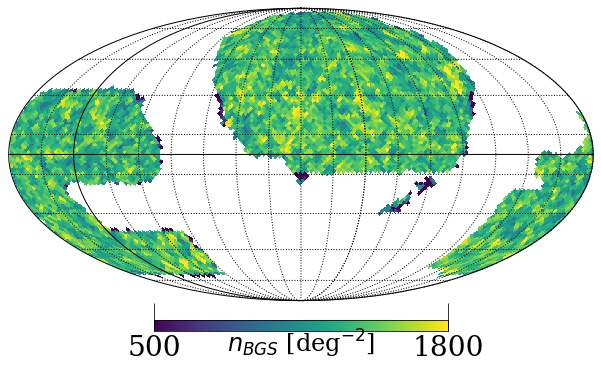

In [155]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=28)

bgs_target_pixel_density = geometry.targ_hpmap(bgs_main_survey_targs,norm=corr_pixel_area,filling_factor=filling_factor)

#mollview map of pixels
#mollview map of pixels
hp.mollview(bgs_target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title=None,min=500,max=1800,unit = r'$n_{BGS}$ [deg$^{-2}$]')
hp.graticule(dpar=5, dmer=5) 

f = plt.gcf() # accessing the current figure...
CbAx = f.get_children()[2] # ... then the colorbar's elements
coord_text_obj = CbAx.get_children()[1] # [1] corresponds to the particular label of the
                                        # colorbar, i.e. "Field value" in this case
coord_text_obj.set_fontsize(24)
plt.savefig('bgs_map.png',bbox_inches='tight')

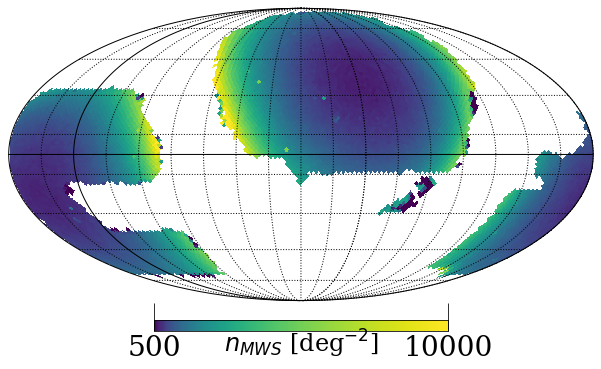

In [156]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=28)

mws_target_pixel_density = geometry.targ_hpmap(mws_main_survey_targs,norm=corr_pixel_area,filling_factor=filling_factor)

#mollview map of pixels
#mollview map of pixels
hp.mollview(mws_target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title=None,min=500,max=10000,unit = r'$n_{MWS}$ [deg$^{-2}$]',norm='log')
hp.graticule(dpar=5, dmer=5) 

f = plt.gcf() # accessing the current figure...
CbAx = f.get_children()[2] # ... then the colorbar's elements
coord_text_obj = CbAx.get_children()[1] # [1] corresponds to the particular label of the
                                        # colorbar, i.e. "Field value" in this case
coord_text_obj.set_fontsize(24)
plt.savefig('mws_map.png',bbox_inches='tight')

In [157]:
bgs_bright_targs = bgs_main_survey_targs[((bgs_main_survey_targs['BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0)]

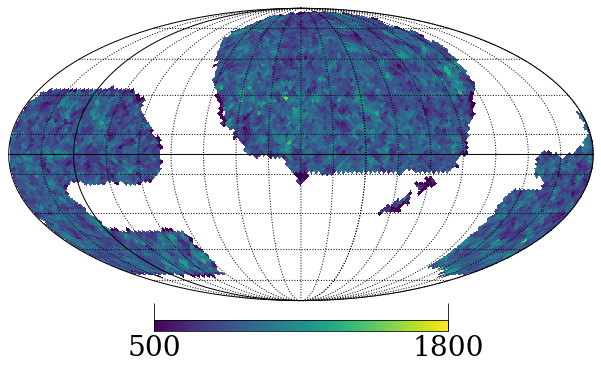

In [158]:

bgs_bright_targs_density = geometry.targ_hpmap(bgs_bright_targs,norm=corr_pixel_area,filling_factor=filling_factor)
hp.mollview(bgs_bright_targs_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title=None,min=500,max=1800)
hp.graticule(dpar=5, dmer=5) 


[1, 13]
BRIGHT 1 0.9905997485514495
CLUSTER 13 0.9904709859266433
NOBS 0.9771151783418405


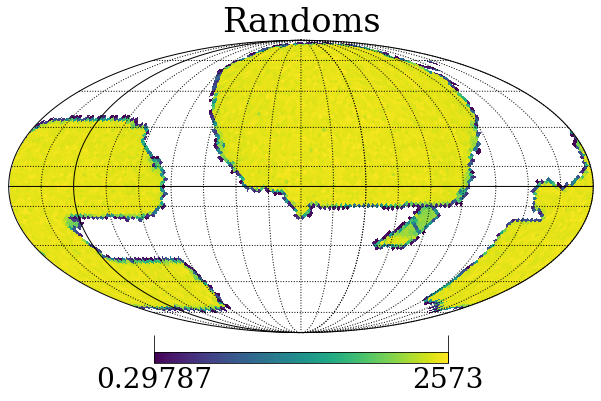

In [159]:

randoms = S4Mock_io.read_desitargetrandoms(number=1)
randoms=geometry.bgs_mask_randoms(randoms)
target_pixel_density = geometry.targ_hpmap(randoms)
hp.mollview(target_pixel_density/pixel_area,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)


In [116]:
targ_pix = geometry.radec2pix(bgs_bright_targs['RA'],bgs_bright_targs['DEC'], nside=32)
bgs_bright_targs['HPX']=targ_pix

targ_pix = geometry.radec2pix(randoms['RA'],randoms['DEC'], nside=32)
randoms=Table(randoms)
randoms['HPX']=targ_pix


pix = geometry.rand_inrect(210,235,40,65)

bgs_bright_targs_small = bgs_bright_targs[np.in1d(bgs_bright_targs['HPX'].data,pix)]
randoms_small = randoms[np.in1d(randoms['HPX'].data,pix)]


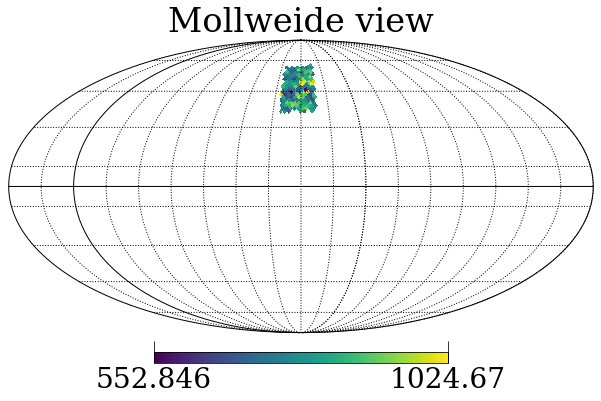

In [117]:
target_pixel_density = geometry.targ_hpmap(bgs_bright_targs_small)
hp.mollview(target_pixel_density/pixel_area,nest=True,rot=(220, 0.0, 0.0), badcolor='white')
hp.graticule(dpar=5, dmer=5)


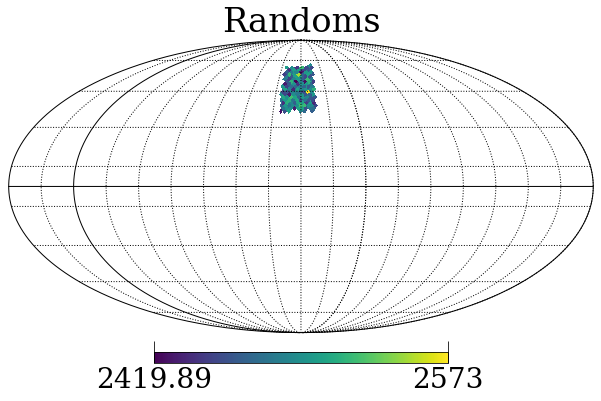

In [119]:
target_pixel_density = geometry.targ_hpmap(randoms_small)
hp.mollview(target_pixel_density/pixel_area,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)


In [120]:
targ_wtheta =  calc_wtheta(bgs_bright_targs_small['RA'],bgs_bright_targs_small['DEC'],randoms_small['RA'],randoms_small['DEC'],nbins=30)

In [146]:
#np.save('targ_wtheta',targ_wtheta)
targ_wtheta = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/targ_wtheta.npy')

In [20]:
#dont need anymore, have fixed alex's one
"""
#mock_all with error bars 

wtheta_mock = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_mock.npy')
mean2 = np.mean(wtheta_mock,axis=0)
stdev2 = np.std(wtheta_mock,axis=0)

#wtheta_main_mock = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_main_mock.npy')
"""

In [170]:
wtheta_all = np.load('/global/u2/l/lbigwood/S4Mock/wtheta_all2.npy')
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)


In [33]:
nbins=30

x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_clustering.dat.fits')
dat = x[1].data


x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_0_full.ran.fits')
ran = x[1].data 

fba_wtheta = calc_wtheta(dat['RA'],dat['DEC'],ran['RA'],ran['DEC'],nbins=nbins)

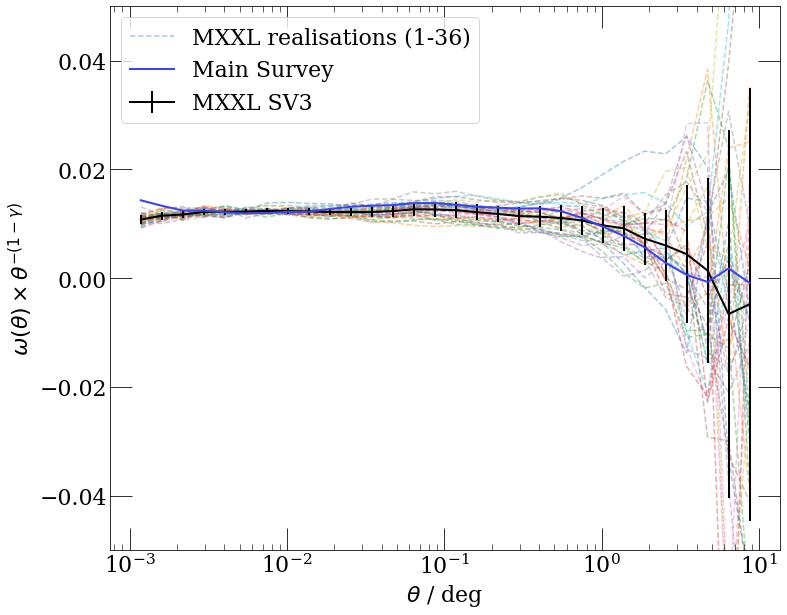

In [151]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)



#mxxl all
x_axis1,y_axis1 = create_axes(wtheta_all[0])
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-36)',zorder=1)


for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',zorder=1)

    
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis1,y_axis1,yerr=y_axis_err,color= 'black',label='MXXL SV3',zorder=2,linewidth=2)


#real all
x_axis,y_axis = create_axes(targ_wtheta)

plt.plot(x_axis,y_axis,color= '#3742fa',label='Main Survey',zorder=3,linewidth=2)


"""
#mxxl all
x_axis1,y_axis1 = create_axes(wtheta_mock[0])
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-6)')


for i in range(1,len(wtheta_mock)):
    x_axis1,y_axis1 = create_axes(wtheta_mock[i])
    plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')

    
x_axis1,y_axis1 = create_axes(mean2)
x_axis1,y_axis_err = create_axes(stdev2)

plt.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)



#mock main all
x_axis,y_axis = create_axes(wtheta_main_mock)

plt.plot(x_axis,y_axis,color= 'red',label='MXXL',zorder=3,linewidth=2)
"""


plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xlabel(r'$\theta$ / deg')
plt.xscale('log')
#plt.yscale('log')
plt.ylim(-0.05,0.05)
plt.legend()

In [169]:
nbins=30

x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_full_noveto.dat.fits')
dat = x[1].data
dat = dat[(dat['FIBERASSIGN_X']<1e20)]


x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_0_full_noveto.ran.fits')
ran = x[1].data 

fba_wtheta = calc_wtheta(dat['RA'],dat['DEC'],ran['RA'],ran['DEC'],nbins=nbins)


<Figure size 864x720 with 0 Axes>

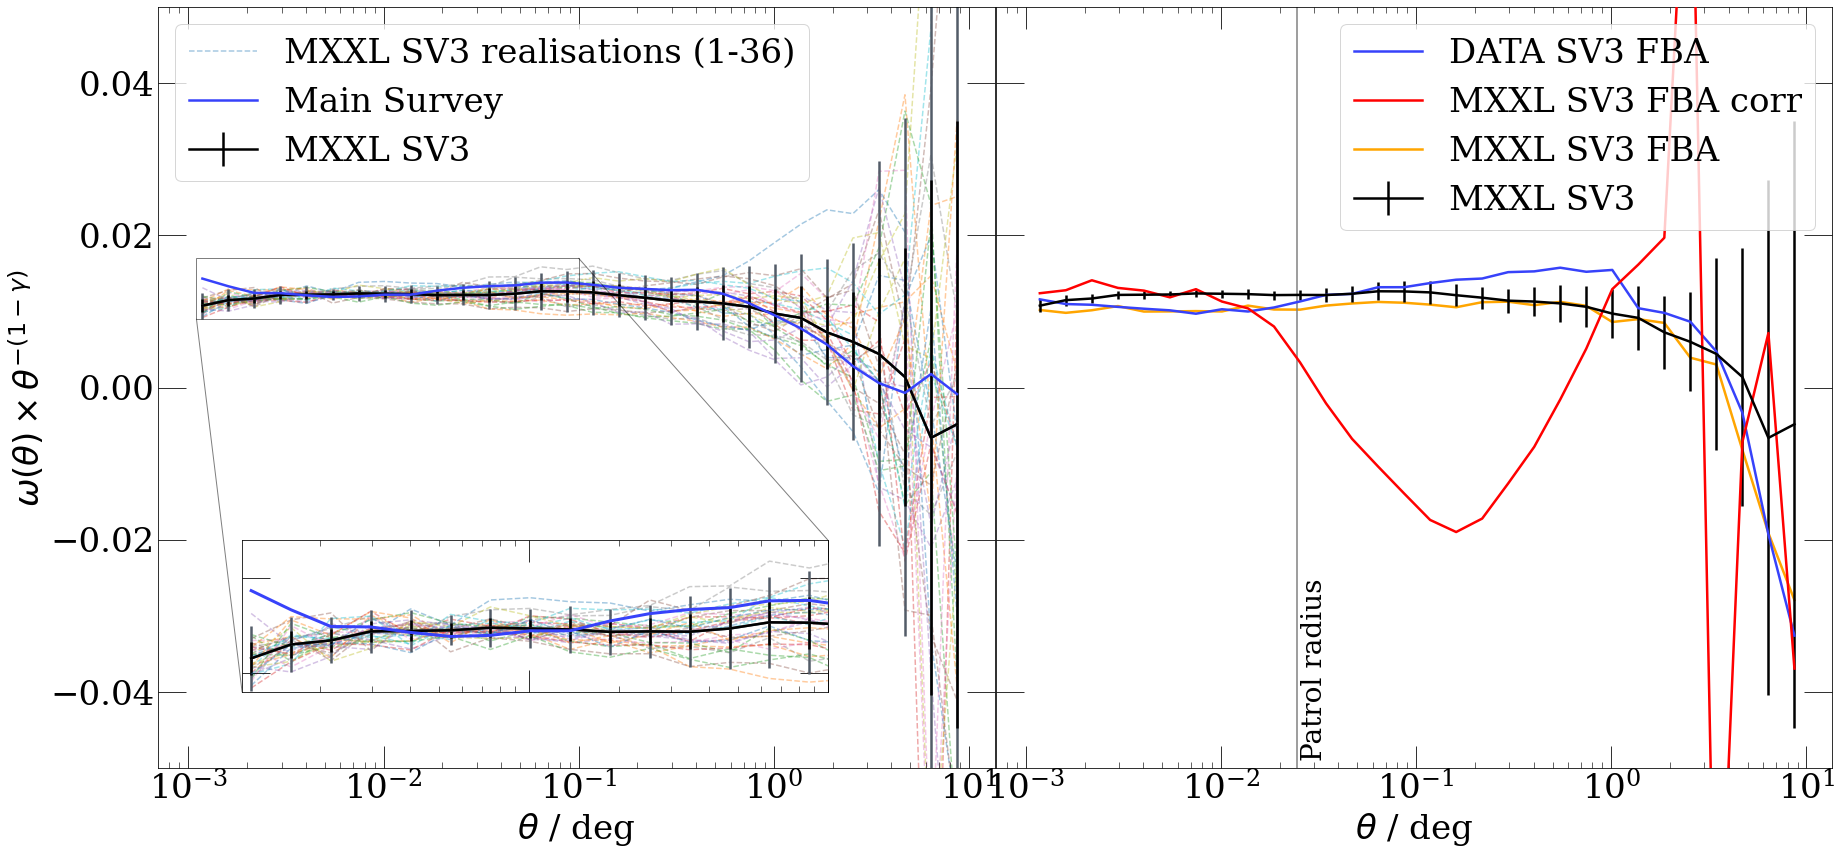

In [173]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=34,top=True)
plt.rc('ytick',direction='in',labelsize=34, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=34)
plt.rc('font', family='serif',size=34)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,14),sharex=True,sharey=True)

ax1.set_ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$',fontsize=34)
ax1.set_xlabel(r'$\theta$ [deg.]',fontsize=34)
ax2.set_xlabel(r'$\theta$ /deg',fontsize=34)

#mxxl all
x_axis1,y_axis1 = create_axes(wtheta_all[0])
ax1.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL SV3 realisations (1-36)',zorder=1)


for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    ax1.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',zorder=1)

    
x_axis1,y_axis1 = create_axes(mean)

x_axis1,y_axis_err2 = create_axes(2*stdev)
ax1.errorbar(x_axis1,y_axis1,yerr=y_axis_err2,color= '#535c68',zorder=2,linewidth=2.5)
x_axis1,y_axis_err = create_axes(stdev)

ax1.errorbar(x_axis1,y_axis1,yerr=y_axis_err,color= 'black',label='MXXL SV3',zorder=2,linewidth=2.5)



#real all
x_axis,y_axis = create_axes(targ_wtheta)

ax1.plot(x_axis,y_axis,color= '#3742fa',label='Main Survey',zorder=3,linewidth=2.5)

ax1.legend()
###
axins = ax1.inset_axes([0.1, 0.1, 0.7, 0.2])
axins.plot(x_axis,y_axis,color= '#3742fa',zorder=3,linewidth=3)

x_axis1,y_axis1 = create_axes(wtheta_all[0])
axins.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')

for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    axins.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',zorder=1)

    

x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err2 = create_axes(2*stdev)
axins.errorbar(x_axis1,y_axis1,yerr=y_axis_err2,color= '#535c68',zorder=2,linewidth=2.5)

x_axis1,y_axis_err = create_axes(stdev)


axins.errorbar(x_axis1,y_axis1,yerr=y_axis_err,color= 'black',zorder=2,linewidth=2.5)


####

# sub region of the original image
x1, x2, y1, y2 = 0.0011, 0.1, 0.009, 0.017
axins.set_xlim(x1, x2)
axins.set_xscale('log')
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])

ax1.indicate_inset_zoom(axins, edgecolor="black")


ax1.set_xscale('log')

########
x_axis,y_axis = create_axes(fba_wtheta)

ax2.plot(x_axis,y_axis,color= '#3742fa',label='DATA SV3 FBA',zorder=3,linewidth=2.5)

wtheta_mock_fba_corr = np.load('/global/u2/l/lbigwood/S4Mock/wtheta_mock_fba_corr.npy')
x_axis,y_axis = create_axes(wtheta_mock_fba_corr)

ax2.plot(x_axis,y_axis,color= 'red',label='MXXL SV3 FBA corr',zorder=3,linewidth=2.5)


wtheta_mock_fba = np.load('/global/u2/l/lbigwood/S4Mock/wtheta_mock_fba.npy')
x_axis,y_axis = create_axes(wtheta_mock_fba)

ax2.plot(x_axis,y_axis,color= 'orange',label='MXXL SV3 FBA',zorder=2,linewidth=2.5)

    
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

ax2.errorbar(x_axis1,y_axis1,yerr=y_axis_err,color= 'black',label='MXXL SV3',zorder=3,linewidth=2.5)
ax2.legend()
patrol_radii  = 1.48/60
ax2.axvline(x=patrol_radii,color='grey',label='Patrol radius')
ax2.text(float(patrol_radii+0.001),-0.037, 'Patrol radius', rotation=90, verticalalignment='center',fontsize=28)
#plt.yscale('log')
plt.ylim(-0.05,0.05)
from matplotlib.pyplot import text

plt.subplots_adjust(wspace=0.001)
#plt.savefig('wtheta_plot.png', bbox_inches='tight')

### plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

#real all
x_axis,y_axis = create_axes(fba_wtheta)

plt.plot(x_axis,y_axis,color= '#3742fa',label='DATA SV3 FBA',zorder=3,linewidth=2)

wtheta_mock_fba = np.load('/global/u2/l/lbigwood/S4Mock/wtheta_mock_fba.npy')
x_axis,y_axis = create_axes(wtheta_mock_fba)

plt.plot(x_axis,y_axis,color= 'orange',label='MXXL SV3 FBA',zorder=3,linewidth=2)

    
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis1,y_axis1,yerr=y_axis_err,color= 'black',label='MXXL SV3',zorder=3,linewidth=2)


plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xlabel(r'$\theta$ / deg')
plt.xscale('log')
#plt.yscale('log')
#plt.ylim(-0.01,0.03)
plt.legend()

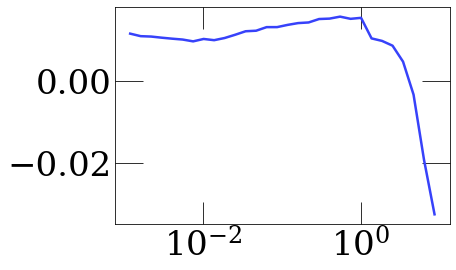

In [174]:
#select only whole healpix 
x_axis,y_axis = create_axes(fba_wtheta)

plt.plot(x_axis,y_axis,color= '#3742fa',label='DATA SV3 FBA',zorder=3,linewidth=2.5)
plt.xscale('log')